## I. NumPy

### Импортируем NumPy

In [1]:
import numpy as np

### Создаем одномерный массив размера 10, заполненный нулями и пятым элементом, равным 1. Трансформируем его в двумерный

In [2]:
a = np.zeros((1, 10))
a[:, 4] = 1
a.resize(2, 5)
a

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Создаем одномерный массив со значениями от 10 до 49, разворачиваем его (первый элемент становится последним) и находим все четные элементы

In [3]:
np.random.seed(3)
b = np.arange(10, 50)
b = b[::-1]
b = np.array([x for x in b if not x%2])
b
#%timeit b

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

In [4]:
d = np.arange(10, 50)
d = d[::-1]
mask = (d % 2 == 0)
even = d[mask]
even
#%timeit even

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

In [5]:
k = np.arange(10, 50)
k = k[::-1]
def even(k):
    return k%2 == 0
k[even(k)]

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создаем двумерный массив 3х3 со значениями от 0 до 8

In [6]:
c = np.arange(0, 9).reshape((3, 3)) # c.resize((3, 3))
c

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создаем массив 4х3х2 со случайными значениями и находим его максимум и минимум

In [7]:
d = np.random.randint(0, 101, size=(4, 3, 2))
d.min(), d.max()

(0, 96)

### Создаем два двумерных массива размерами 6х4 и 4х3 и производим их матричное умножение

In [8]:
A = np.random.randint(0, 100, size=(6, 4))
A

array([[63, 60,  1, 51],
       [90, 69, 97, 29],
       [24, 62,  7, 43],
       [33, 79, 48, 37],
       [20, 94, 49, 21],
       [78, 28, 54,  0]])

In [9]:
B = np.random.rand(4, 3)
B

array([[0.90283411, 0.84575087, 0.37799404],
       [0.09221701, 0.6534109 , 0.55784076],
       [0.36156476, 0.2250545 , 0.40651992],
       [0.46894025, 0.26923558, 0.29179277]])

In [10]:
C = A.dot(B)
C

array([[ 86.68908682, 106.44302804,  72.57202175],
       [136.28909261, 150.84104943, 120.40489867],
       [ 50.08085719,  73.96200827,  59.05071297],
       [ 71.78456711, 100.29357268,  86.85251222],
       [ 54.28949962,  95.01726014,  86.04403665],
       [ 92.52763392,  96.41701649,  67.05515205]])

### Создаем случайный двумерный массив 7х7, находим у него среднее и стандартное отклонение. До кучи - нормализуем

In [11]:
f = np.random.randint(-100, 100, size=(7, 7))
f

array([[ 44, -20,  60,  44, -82, -25,  83],
       [ -4,  41,  65,  58, -52,  89, -67],
       [-48, -98,  56, -64, -10,  72,  76],
       [-41,  82,  -9, -79,  13, -44,   4],
       [-61, -71,  60,  76, -91, -67,  88],
       [-45, -89,  38,  12, -24, -32, -56],
       [-56, -81,  44,  20,  67,  78,  93]])

In [12]:
print(f'Медиана равна {f.mean()}')
print(f'Отклонение равно {f.std()}')

Медиана равна 0.9591836734693877
Отклонение равно 60.55692521231858


In [13]:
def normalize(f):
    return (f - f.mean())/f.std()
print(normalize(f))

[[ 0.7107497  -0.34610713  0.97496391  0.7107497  -1.36993719 -0.42867407
   1.35477183]
 [-0.08189292  0.66120953  1.05753085  0.94193713 -0.87453555  1.45385216
  -1.12223637]
 [-0.80848199 -1.63415139  0.90891035 -1.0726962  -0.18097325  1.17312456
   1.23917811]
 [-0.69288828  1.33825844 -0.16445986 -1.32039702  0.19883467 -0.74242844
   0.05021418]
 [-1.02315604 -1.18828992  0.97496391  1.23917811 -1.51855768 -1.12223637
   1.43733877]
 [-0.75894183 -1.4855309   0.61166937  0.18232128 -0.41216068 -0.54426779
  -0.9405891 ]
 [-0.9405891  -1.3534238   0.7107497   0.31442839  1.09055762  1.27220489
   1.51990571]]


# II. Pandas

### Импортируем pandas, matplotlib, seaborn

In [14]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

### Загружаем датасет Tips из набора датасетов seaborn и смотрим на первые пять строчек

In [15]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Хотим узнать, сколько всего строчек и колонок в данных

In [16]:
tips.shape

(244, 7)

In [17]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

### Проверяем пропуски в данных

In [18]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Они отсутствуют, что не может не радовать

In [19]:
# можно визуализировать
#import missingno as msno
#msno.matrix(tips, labels=True, sort="descending");

#### Посмотрим на типы данных

In [20]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Посмотрим на распределение числовых признаков

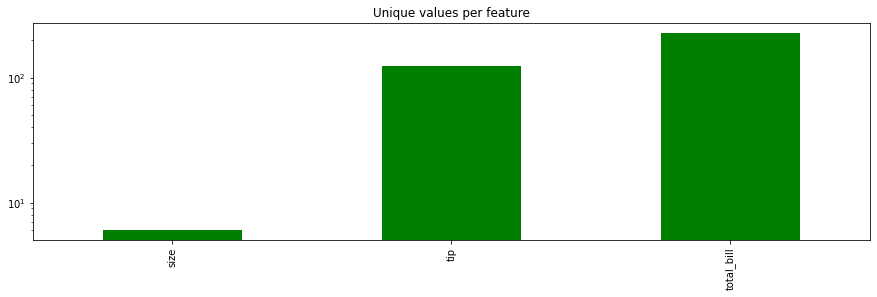

In [21]:
# Изучим уникальные значения
unique_values = tips.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), color = "green", 
                       title="Unique values per feature");

In [22]:
# можно так
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

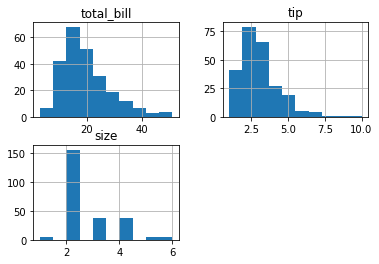

In [23]:
tips.hist();

Предварительно из гистограмм видно, что распределения счета и чаевых скошено вправо, что намекает нам на малое количество выбросов с большим значением. Интересно знать, кто эти люди, учитывая, что чаще всего ходят парами. 

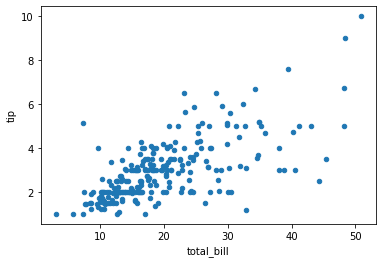

In [24]:
tips.plot(x='total_bill', y='tip', kind='scatter');

Вот, например, слева выбились из общего строя граждане, оставившие маленький счет, но большие чаевые, и справа - наоборот: ели, как не в себя, или пришли толпой, официант - в мыле, а они чаевые зажали.

### Найдем максимальное значение 'total_bill'

In [25]:
tips['total_bill'].max()

50.81

### Найдем количество курящих 

In [26]:
len(tips[tips['smoker'] == 'Yes'])

93

Курящих меньше половины, интересно, влияет ли дурная привычка на размер чаевых? У доморощенного аналитика есть предположение, что - да, у курящих больше причин для щедрости.

In [27]:
tips.groupby('smoker')['tip'].median()

smoker
Yes    3.00
No     2.74
Name: tip, dtype: float64

Если бы мы оставляли чаевые в Беларуси, то 30 копеек - существенная разница.

In [28]:
#Набор датасета небольшой, наверное, имеет смысл посмотреть на моду:
tips.mode()

,total_bill,tip,sex,smoker,day,time,size
0,13.42,2.0,Male,No,Sat,Dinner,2


Вот, пожалуйста: два некурящих дядьки в субботу поужинали и оставили два белорусских рубля. Кстати, это больше 10%, поэтому в дальнейшем имеет смысл рассмотреть - какую часть от счета люди предпочитают оставлять в качестве чаевых.

### Узнаем какой cредний 'total_bill' в зависимости от 'day'

In [29]:
tips.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

В выходные народ тратит больше.

### Отберем строчки с 'total_bill' больше медианы и узнаем, какой средний 'tip' в зависимости от 'sex'

In [30]:
median_tb = tips['total_bill'].median()
median_tb

17.795

In [31]:
tips[tips['total_bill'] > median_tb].groupby('sex')['tip'].mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

Ниже - пара вспомогательных строк

In [32]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [33]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

### Преобразуем признак 'smoker' в бинарный (0 - 'No', 1 - 'Yes')

In [34]:
tips = tips.replace({'smoker': {'No' : 0, 'Yes' : 1}})
tips.sample(7)

,total_bill,tip,sex,smoker,day,time,size
31,18.35,2.50,Male,0,Sat,Dinner,4
66,16.45,2.47,Female,0,Sat,Dinner,2
164,17.51,3.00,Female,1,Sun,Dinner,2
129,22.82,2.18,Male,0,Thur,Lunch,3
221,13.42,3.48,Female,1,Fri,Lunch,2
208,24.27,2.03,Male,1,Sat,Dinner,2
123,15.95,2.00,Male,0,Thur,Lunch,2


Добавим столбец per_of_tb, в котором отобразятся чаевые как часть счета

In [35]:
tips['per_of_tb'] = (tips['tip']/tips['total_bill']).round(2)
tips.sample(7)

,total_bill,tip,sex,smoker,day,time,size,per_of_tb
107,25.21,4.29,Male,1,Sat,Dinner,2,0.17
213,13.27,2.50,Female,1,Sat,Dinner,2,0.19
131,20.27,2.83,Female,0,Thur,Lunch,2,0.14
232,11.61,3.39,Male,0,Sat,Dinner,2,0.29
243,18.78,3.00,Female,0,Thur,Dinner,2,0.16
192,28.44,2.56,Male,1,Thur,Lunch,2,0.09
194,16.58,4.00,Male,1,Thur,Lunch,2,0.24


In [36]:
tips.describe()

,total_bill,tip,smoker,size,per_of_tb
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.381148,2.569672,0.160943
std,8.902412,1.383638,0.486667,0.951100,0.061030
min,3.070000,1.000000,0.000000,1.000000,0.040000
25%,13.347500,2.000000,0.000000,2.000000,0.130000
50%,17.795000,2.900000,0.000000,2.000000,0.155000
75%,24.127500,3.562500,1.000000,3.000000,0.190000
max,50.810000,10.000000,1.000000,6.000000,0.710000


Кто-то расчувствовался и оставил 70% от счета. Стоит отметить, что люди оставляют в среднем больше пресловутых 10%.

# III. Visualization

### Построим гистограмму распределения признака 'total_bill'

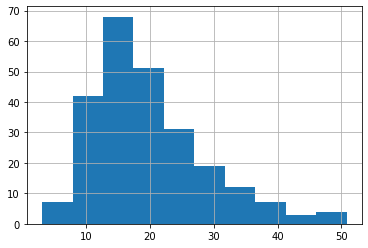

In [37]:
tips['total_bill'].hist();

In [38]:
#tips.columns

### Построим scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

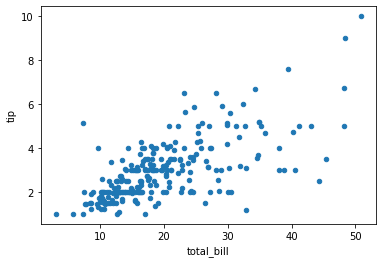

In [39]:
tips.plot.scatter(x='total_bill', y='tip');

Немного отсебятины

In [40]:
#tips.plot(lw=0, marker="+", subplots = True, layout=(-1, 3),
          #figsize=(20, 20), markersize=5);

In [41]:
import matplotlib.pyplot as plt

In [42]:
#распределение функций
#tips.hist(bins=25, figsize=(20, 10), layout=(-1, 4), edgecolor='green', color = 'blue')
#plt.tight_layout();

Text(0.5, 0.98, 'Histograms of various features')

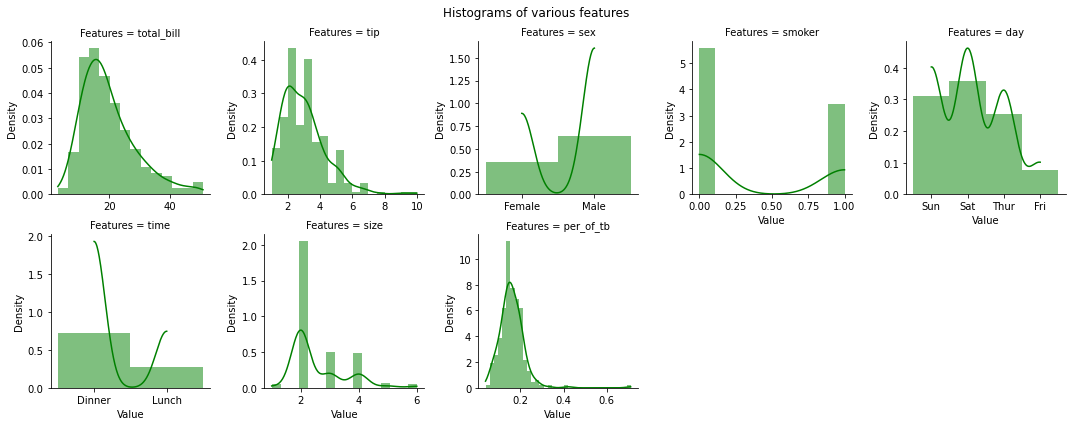

In [43]:
features = tips.select_dtypes(exclude=['object','bool'])
features = features.stack().reset_index().rename(columns = {'level_1':'Features', 0 : 'Value'})
ax = sns.FacetGrid(data = features, col = 'Features',  col_wrap = 5, sharex = False, sharey = False)
ax = ax.map(sns.histplot, 'Value', kde=True, stat='density', linewidth=0, color ='green')
plt.subplots_adjust(top = 0.9)
plt.suptitle('Histograms of various features')

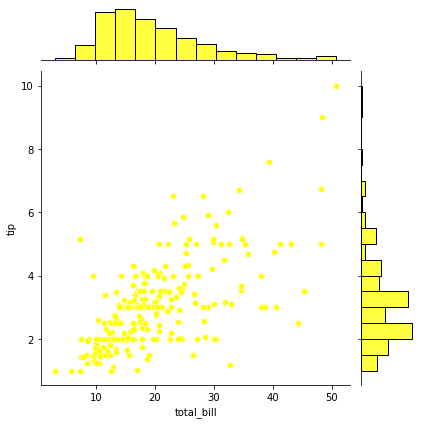

In [44]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter', color ='yellow');

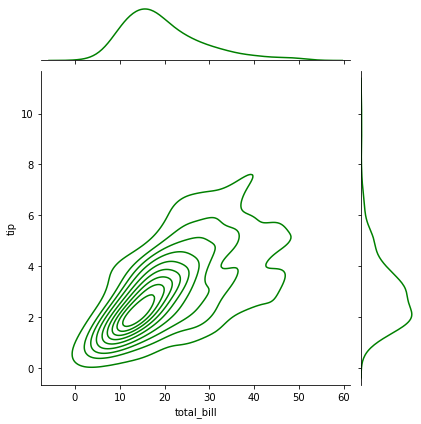

In [45]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', color='g');

### Построим pairplot

In [46]:
#cols = ['total_bill', 'tip', 'day']
#sns.pairplot(tips[cols], hue='day', height=5, palette="Set1");

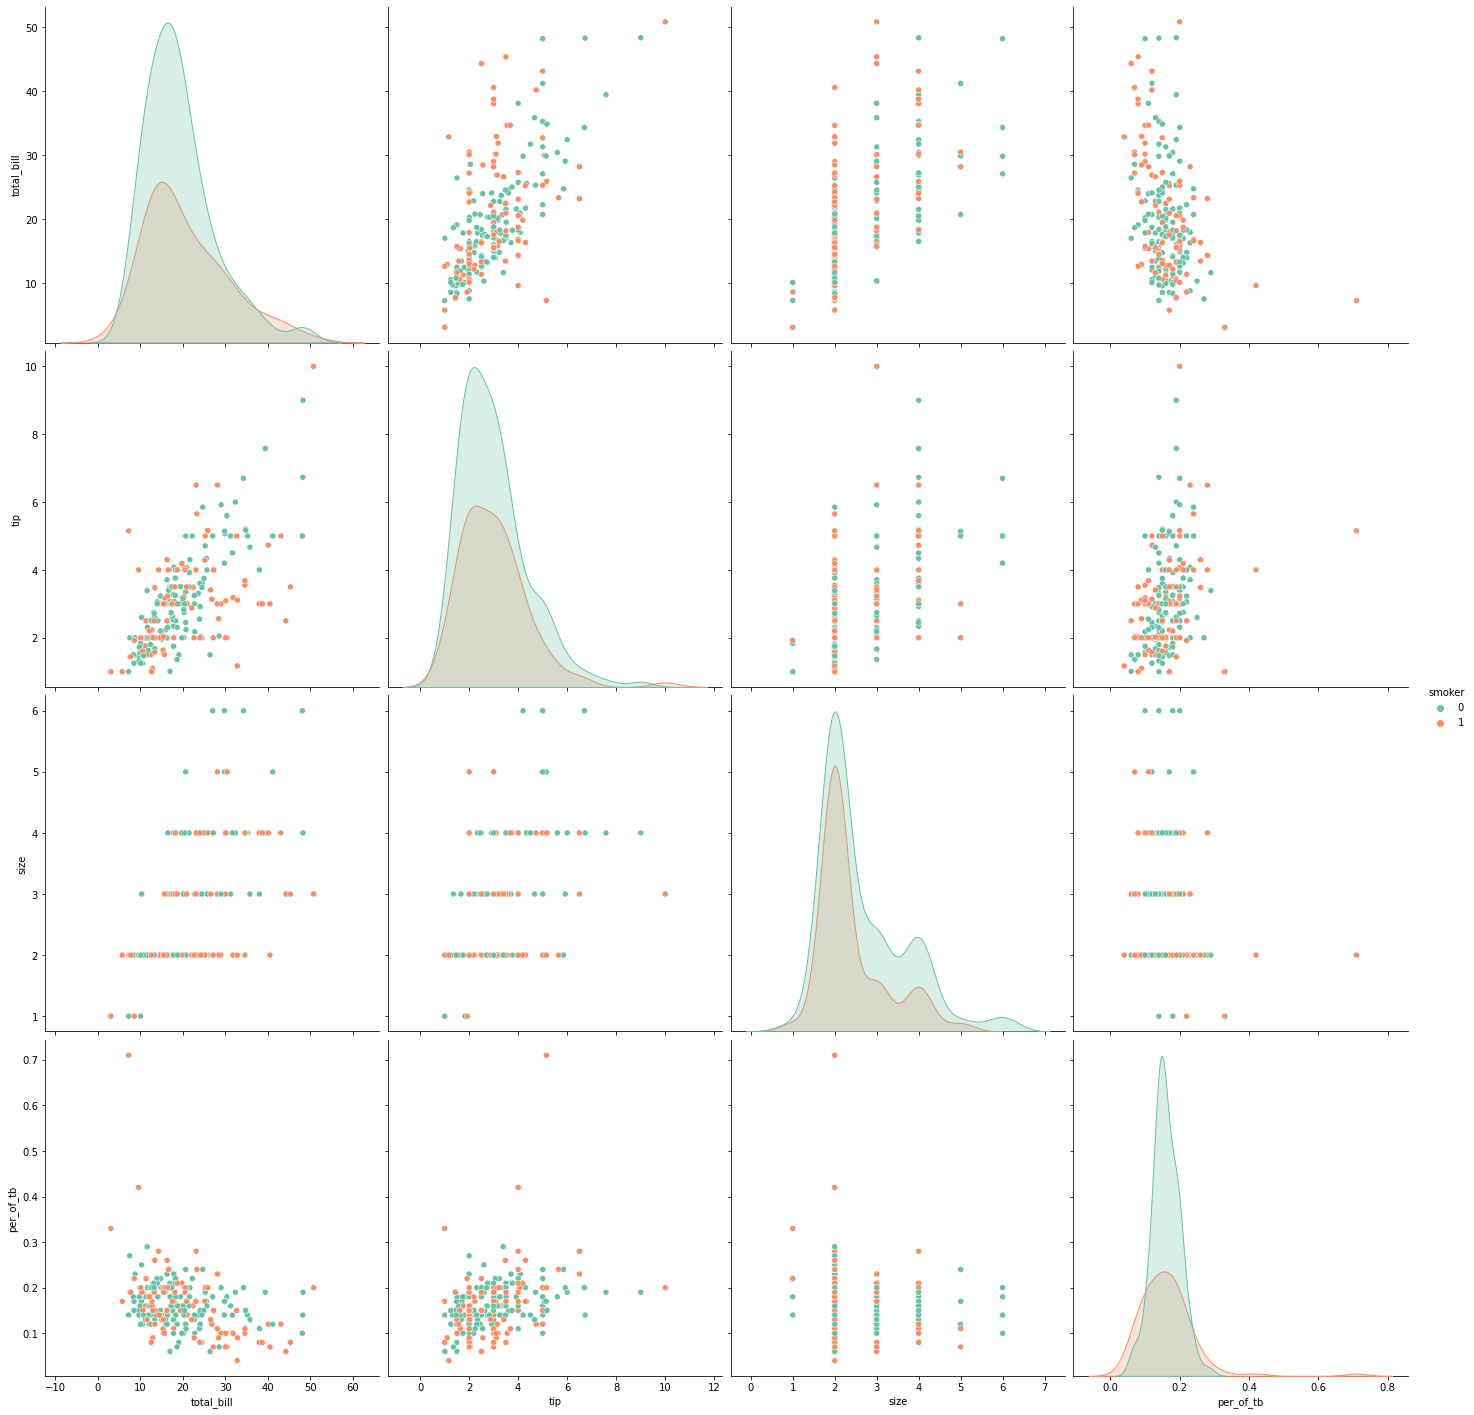

In [47]:
sns.pairplot(tips, hue='smoker', height=5, palette='Set2');

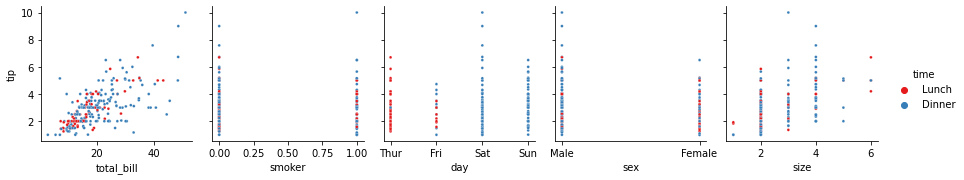

In [48]:
sns.pairplot(
    tips, plot_kws={'s': 8, 'alpha': 1}, hue='time', palette='Set1',
    x_vars=['total_bill', 'smoker', 'day', 'sex', 'size'],
    y_vars='tip');

Интересно распределились чаевые по дням недели: в четверг чаще обедают и более щедры, чем в пятницу, а в субботу и воскресенье - ужинают и щедрее - в субботу.

### Построим график взаимосвязи между признаками 'total_bill' и 'day'

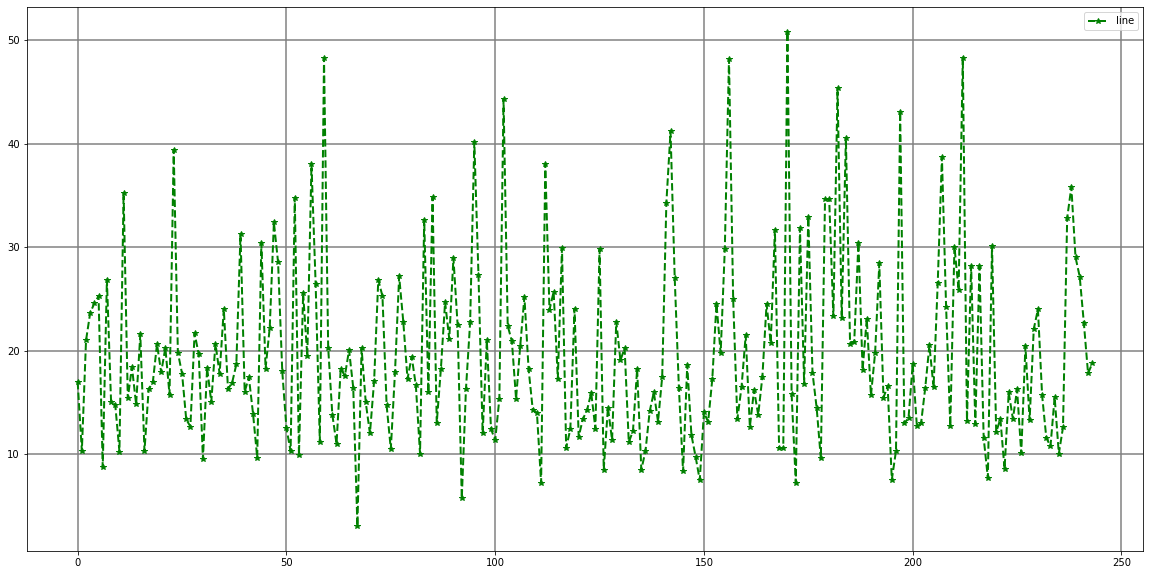

In [49]:
x = tips['total_bill']
y = tips['tip']

plt.figure(figsize=(20,10))
plt.plot(x, linewidth=2, color='green', marker='*', linestyle='dashed', label='line')
plt.legend()
plt.grid(color='gray', linestyle='-', linewidth=1.5)
plt.yticks()
plt.xticks();
#plt.xlabel('ось абсцисс')
#plt.ylabel('ось ординат');

### Построим две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

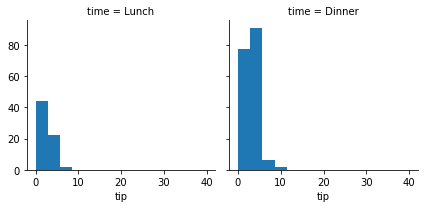

In [50]:
grid = sns.FacetGrid(tips, col='time', margin_titles=True)
grid.map(plt.hist, 'tip', bins=np.linspace(0, 40, 15));

### Построим два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой - для Female и раскрасим точки в зависимости от признака 'smoker'

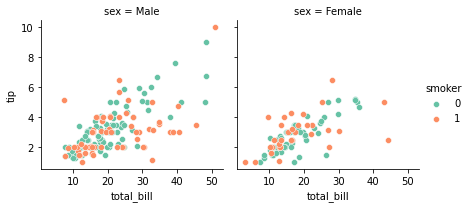

In [51]:
g = sns.FacetGrid (data=tips, col='sex', hue='smoker', palette='Set2', col_wrap= 2)

g.map(sns.scatterplot, 'total_bill', 'tip')

g.add_legend();

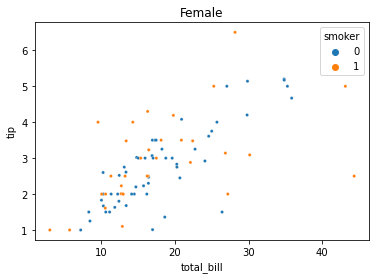

In [53]:
sns.scatterplot(x='total_bill', y='tip',
                data=tips[tips['sex'] == 'Female'], hue='smoker', s=10)
plt.title('Female');

#### Прочие упражнения

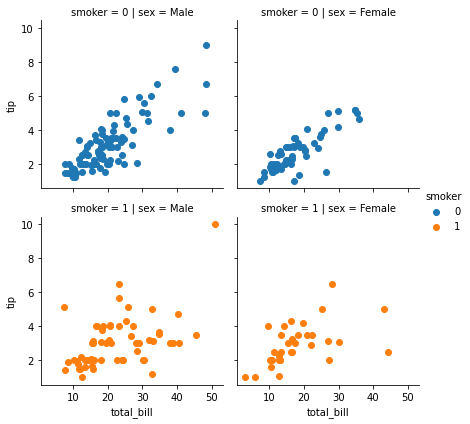

In [54]:
df = sns.FacetGrid(tips, col='sex', row='smoker', hue='smoker')
df = df.map(plt.scatter, "total_bill", "tip").add_legend()

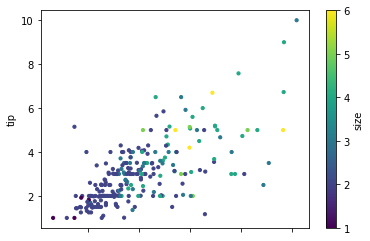

In [55]:
tips.plot.scatter(x='total_bill', y='tip', c='size', cmap="viridis", s=10);

In [56]:
#tips.groupby('day')['size'].sum().plot(kind='bar', rot=75, color='green');

Не пойму, почему в четверг больше народа, чем в пятницу.

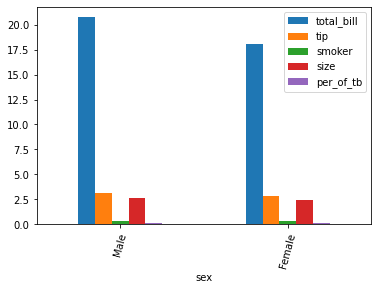

In [57]:
tips.groupby('sex').mean().plot(kind='bar', rot=75);

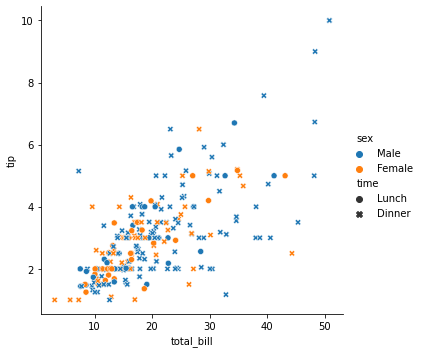

In [58]:
sns.relplot(x='total_bill', y='tip', hue='sex', style='time', data=tips);

Мужчины более активны в смысле ужина, чем женщины, и счета их, в целом, больше, и чаевые.

In [59]:
tips.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [60]:
tips.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

Уточнила своё предположение.

### Сделаем выводы по анализу датасета и построенным графикам. По желанию продолжим анализ данных.

In [61]:
df_corr = tips.corr(method="spearman")

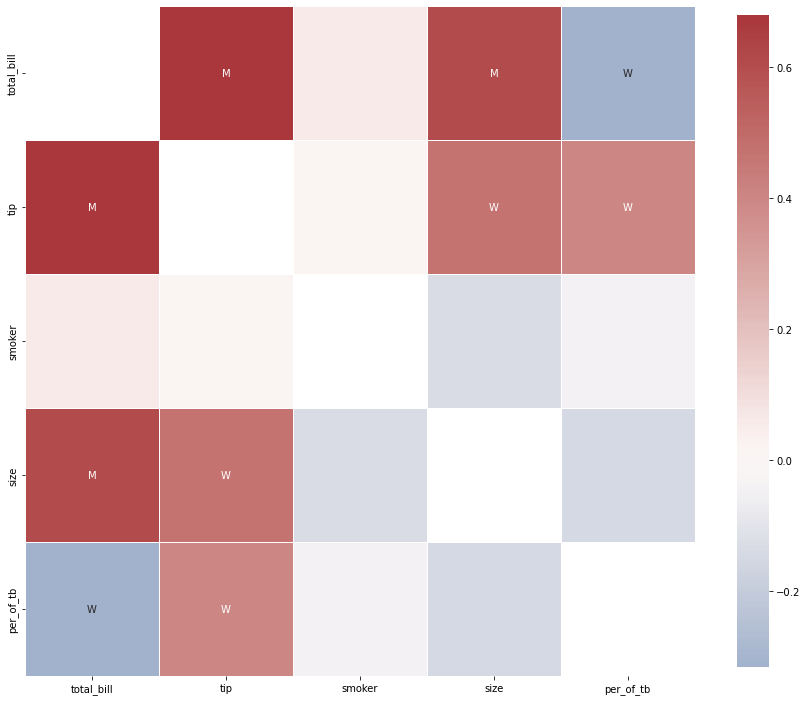

In [62]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

##### 1. Очевидная высокая корреляция наблюдается между размером счета, чаевыми и размером компании.
##### 2. Очень высокая отрицательная корреляция между днем недели и временем прихода, то есть в четверг чаще обедают, а в субботу - ужинают.
##### 3. Курение, не влияет ни на что, хотя и очень желалось притянуть за уши тяжелую долю курильщика.
##### 4. Чаще всего ходят парами, а в субботу - по трое, большинство не курит.
##### 5. В пятницу денег тратят меньше, чем в четверг и в выходные.
##### 6. Компания из одного-двух человек оставят бОльший процент в качестве чаевых, чем четыре-пять.

In [63]:
#attr = tips.columns

In [64]:
#tips[ attr].groupby('day')[attr].median().T

In [65]:
#tips[ attr].groupby('size')[attr].median().T

In [66]:
#tips[ attr].groupby('time')[attr].mean().T

In [67]:
tips.to_csv('data_1.csv')